In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# Pandas options set to max due to big dataset
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

In [3]:
#load the dataset
loans = pd.read_csv('loan_database_2019.csv')

D:\Anaconda3\envs\scraper\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (1,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
#to lean the column n rowcount
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518123 entries, 0 to 518122
Columns: 151 entries, Unnamed: 0 to settlement_term
dtypes: float64(112), int64(1), object(38)
memory usage: 596.9+ MB


In [5]:
loans.sample(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
296763,49941,157779822,NaN,9600.0,9600.0,9600.0,36 months,10.33%,311.26,B,B1,Administrative Specialist,10+ years,MORTGAGE,70072.79,Source Verified,Aug-19,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=157779822,NaN,debt_consolidation,Debt consolidation,085xx,NJ,22.69,0.0,Feb-09,745.0,749.0,0.0,28.0,NaN,9.0,0.0,6713.0,18.30%,12.0,w,7470.13,7470.13,2795.83,2795.83,2129.87,665.96,0.0,0.0,0.0,May-20,311.26,Jun-20,May-20,744.0,740.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,169350.0,0.0,2.0,1.0,1.0,8.0,28495.0,54.0,0.0,1.0,6306.0,39.0,36700.0,1.0,0.0,1.0,2.0,18817.0,28987.0,18.8,0.0,0.0,52.0,109.0,21.0,8.0,2.0,21.0,NaN,8.0,28.0,0.0,2.0,2.0,5.0,6.0,2.0,6.0,8.0,2.0,9.0,0.0,0.0,0.0,1.0,83.3,0.0,0.0,0.0,287241.0,35208.0,35700.0,53146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
370308,123486,154978232,NaN,40000.0,40000.0,40000.0,60 months,10.33%,856.40,B,B1,Systems analyst,3 years,RENT,75000.00,Source Verified,Jul-19,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=154978232,NaN,credit_card,Credit card refinancing,100xx,NY,29.78,2.0,Dec-05,710.0,714.0,0.0,14.0,NaN,21.0,0.0,25024.0,43.90%,40.0,w,34526.35,34526.35,8668.09,8668.09,5473.65,3194.44,0.0,0.0,0.0,May-20,1006.40,Jun-20,May-20,734.0,730.0,0.0,18.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,69876.0,1.0,7.0,0.0,0.0,35.0,44852.0,59.0,1.0,1.0,7439.0,53.0,57000.0,0.0,0.0,0.0,1.0,3327.0,21025.0,51.7,0.0,0.0,163.0,113.0,1.0,1.0,0.0,1.0,18.0,NaN,18.0,0.0,9.0,12.0,9.0,13.0,20.0,14.0,20.0,12.0,21.0,0

In [6]:
#Target Variable
loans['loan_status'].value_counts(dropna=False)

Current               431764
Fully Paid             61840
Charged Off            13487
Late (31-120 days)      6228
In Grace Period         3695
Late (16-30 days)       1015
Default                   78
NaN                       16
Name: loan_status, dtype: int64

In [7]:
missing_val = loans.isnull().mean().sort_values(ascending=False)
missing_val.head(10)

desc                                   1.000000
member_id                              1.000000
debt_settlement_flag_date              0.998603
settlement_percentage                  0.998603
settlement_term                        0.998603
settlement_status                      0.998603
settlement_date                        0.998603
settlement_amount                      0.998603
sec_app_mths_since_last_major_derog    0.957663
mths_since_last_record                 0.893614
dtype: float64

Text(0, 0.5, 'Val Count')

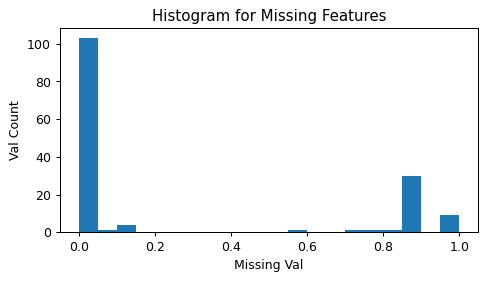

In [8]:
plt.figure(figsize=(6,3), dpi=90)
missing_val.plot.hist(bins=20)
plt.title('Histogram for Missing Features')
plt.xlabel('Missing Val')
plt.ylabel('Val Count')

In [9]:
drop_list = sorted(list(missing_val[missing_val > 0.3].index))
print(drop_list)

['annual_inc_joint', 'debt_settlement_flag_date', 'deferral_term', 'desc', 'dti_joint', 'hardship_amount', 'hardship_dpd', 'hardship_end_date', 'hardship_last_payment_amount', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'member_id', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'orig_projected_additional_accrued_interest', 'payment_plan_start_date', 'revol_bal_joint', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_earliest_cr_line', 'sec_app_fico_range_high', 'sec_app_fico_range_low', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_mths_since_last_major_derog', 'sec_app_num_rev_accts', 'sec_app_open_acc', 'sec_app_open_act_il', 'sec_app_revol_util', 'settlement_amount', 'settlement_date', 'settlement_percentage', 'settlement_status', 'se

In [10]:
len(drop_list)

43

In [11]:
loans.drop(labels=drop_list, axis=1, inplace=True)

In [12]:
loans.shape

(518123, 108)

Here im making an important scope downin this project, i only wants to do the research related to investors info on risk invoved to make an investment, thus for feature scope down i will be using the data dictionary. Not all the features from "investor_info" investor_features could be matched with the original features data_feat so I print out the unmatched features from both lists to see if some of them could be matched manually.

In [13]:
#!pip install xlrd --install if required
investor_info = pd.read_excel('LCDataDictionary.xlsx', sheet_name=1)
investor_info.head()

investor_features = investor_info['BrowseNotesFile'].dropna().values
investor_features = [re.sub('(?<![0-9_])(?=[A-Z0-9])', '_', x).lower().strip() for x in investor_features]

len(investor_features)

121

In [14]:
new_drop_list = [col for col in loans.columns if col not in investor_features]
print(new_drop_list)

['Unnamed: 0', 'funded_amnt_inv', 'verification_status', 'issue_d', 'pymnt_plan', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'policy_code', 'mo_sin_old_il_acct', 'mths_since_recent_inq', 'hardship_flag', 'debt_settlement_flag']


In [15]:
len(new_drop_list)

25

In [16]:
loans.drop(labels=new_drop_list, axis=1, inplace=True)

In [17]:
loans.shape

(518123, 83)

In [18]:
#loans.isna().sum()
further_cleanup = ['emp_title','emp_length','url','mths_since_rcnt_il', 'il_util','num_tl_120dpd_2m', 'tax_liens']
loans.drop(labels=further_cleanup, axis=1, inplace=True)

In [19]:
loans['loan_status'].value_counts(dropna=False)
loans = loans.loc[loans['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [20]:
loans.shape

(75327, 76)

In [21]:
#num_feat = loans.select_dtypes('number').columns.values
#loans[num_feat].nunique().sort_values()

In [22]:
#End of preliminary check

In [24]:
loans.to_csv("loan_precheck_db.csv")

In [25]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75327 entries, 9 to 518114
Data columns (total 76 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          75327 non-null  object 
 1   loan_amnt                   75327 non-null  float64
 2   funded_amnt                 75327 non-null  float64
 3   term                        75327 non-null  object 
 4   int_rate                    75327 non-null  object 
 5   installment                 75327 non-null  float64
 6   grade                       75327 non-null  object 
 7   sub_grade                   75327 non-null  object 
 8   home_ownership              75327 non-null  object 
 9   annual_inc                  75327 non-null  float64
 10  loan_status                 75327 non-null  object 
 11  purpose                     75327 non-null  object 
 12  title                       75327 non-null  object 
 13  zip_code                    75

In [ ]:
#end of question